### Diabetes Prediction

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
x = pd.DataFrame(dataset['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
y = dataset['target']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [11]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

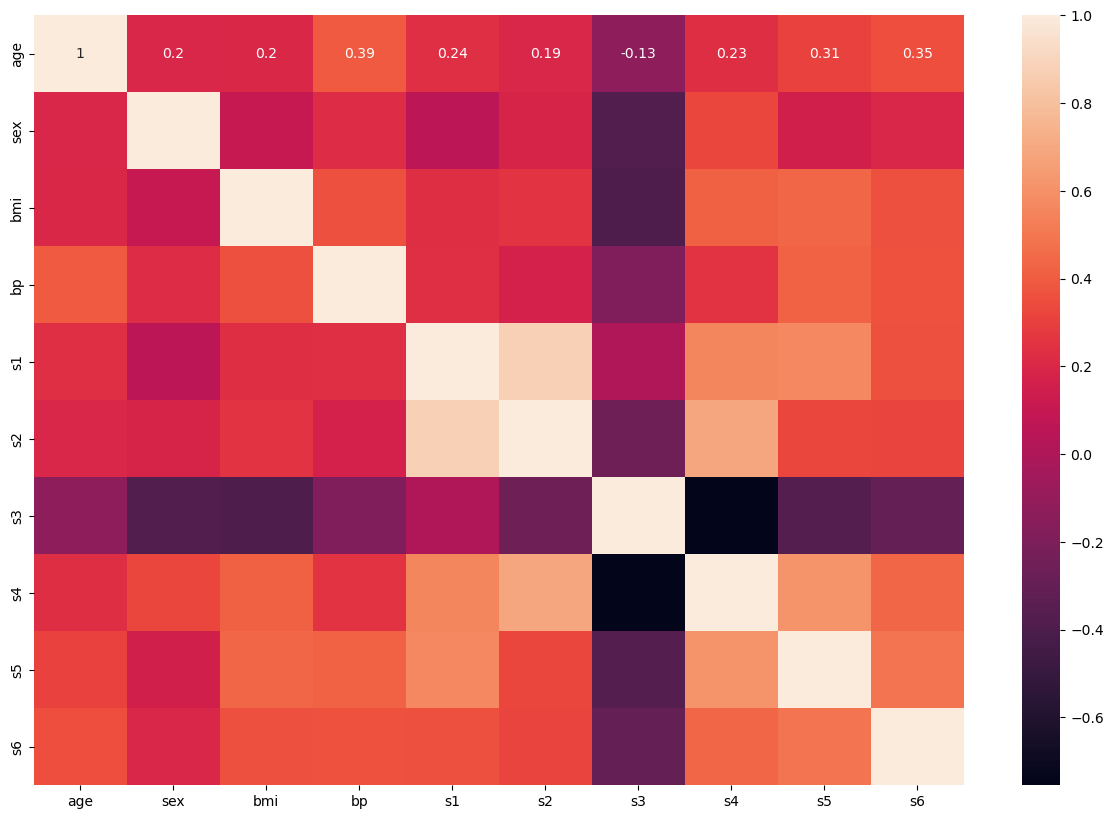

In [10]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [12]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
treeregressor = DecisionTreeRegressor()
treeregressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [14]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid = GridSearchCV(treeregressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [20]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [21]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [22]:
grid.best_score_

-3785.0807373918715

In [23]:
y_pred = grid.predict(x_test)

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.4353657531189933
48.761812578591375
3572.8198032534365


In [27]:
selectmodel = DecisionTreeRegressor(criterion='friedman_mse',splitter='best',max_depth=4,max_features='log2')
selectmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.5, 0.9, 'x[6] <= -0.016\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[0] <= 0.007\nfriedman_mse = 5685.833\nsamples = 138\nvalue = 188.123'),
 Text(0.125, 0.5, 'x[2] <= 0.039\nfriedman_mse = 5808.334\nsamples = 59\nvalue = 168.932'),
 Text(0.0625, 0.3, 'x[7] <= 0.031\nfriedman_mse = 3423.585\nsamples = 42\nvalue = 141.286'),
 Text(0.03125, 0.1, 'friedman_mse = 3711.82\nsamples = 17\nvalue = 115.059'),
 Text(0.09375, 0.1, 'friedman_mse = 2441.786\nsamples = 25\nvalue = 159.12'),
 Text(0.1875, 0.3, 'x[4] <= 0.037\nfriedman_mse = 5146.415\nsamples = 17\nvalue = 237.235'),
 Text(0.15625, 0.1, 'friedman_mse = 1651.918\nsamples = 7\nvalue = 283.286'),
 Text(0.21875, 0.1, 'friedman_mse = 5069.0\nsamples = 10\nvalue = 205.0'),
 Text(0.375, 0.5, 'x[8] <= 0.021\nfriedman_mse = 5113.868\nsamples = 79\nvalue = 202.456'),
 Text(0.3125, 0.3, 'x[7] <= 0.094\nfriedman_mse = 5102.3\nsamples = 38\nvalue = 170.553'),
 Text(0.28125, 0.1, 'friedman_mse = 4433.781\n

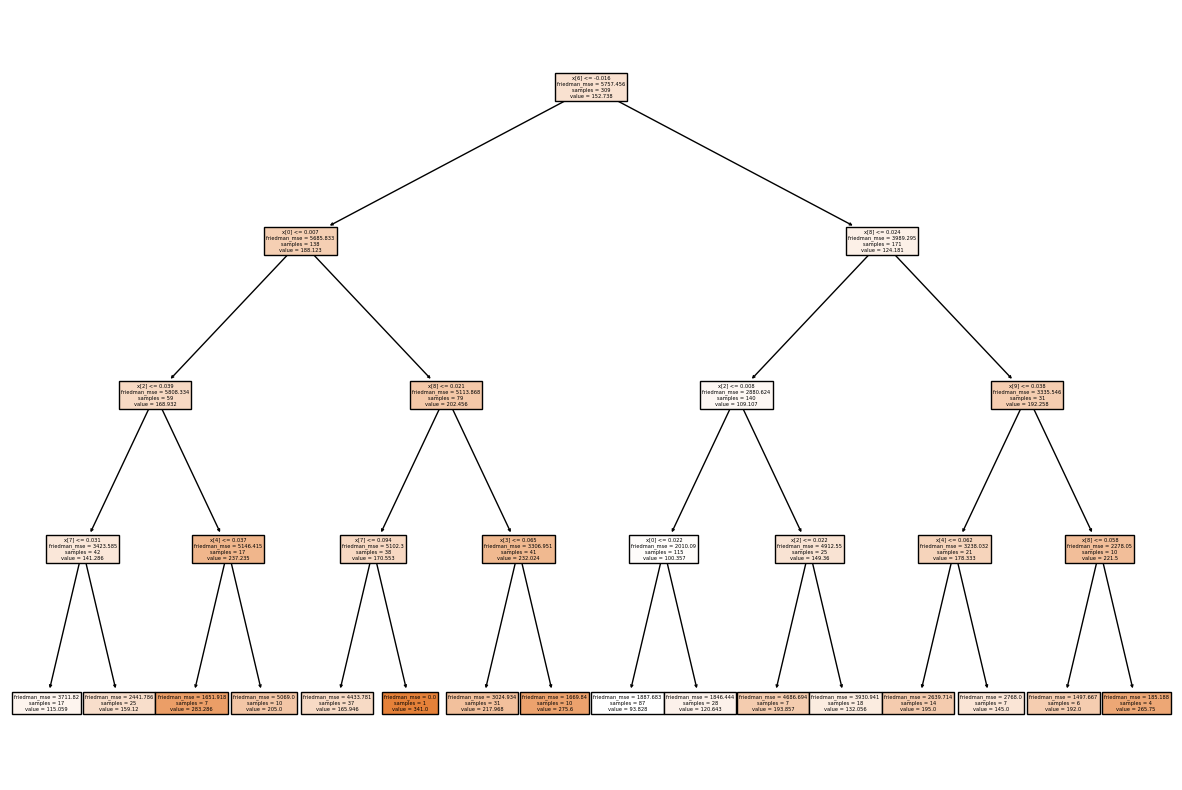

In [28]:
# To visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)